In [33]:
#importing libraries
import pandas as pd

In [34]:
#exploring data information
df = pd.read_csv('marketing_AB.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null

In [35]:
#Checking for missimg values,duplication rows,test group distribution and conversion distribution
print("Missing values:")
print(df.isnull().sum())
print("\nDuplicate rows:")
print(df.duplicated().sum())
print("\nTest group distribution:")
print(df['test group'].value_counts())
print("\nConversion distribution:")
print(df['converted'].value_counts())

Missing values:
Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

Duplicate rows:
0

Test group distribution:
test group
ad     564577
psa     23524
Name: count, dtype: int64

Conversion distribution:
converted
False    573258
True      14843
Name: count, dtype: int64


In [36]:
#Calculating conversion rates

conversion_by_group = df.groupby('test group')['converted'].agg(['count', 'sum', 'mean'])
print("Conversion rates by test group:")
print(conversion_by_group)
print()

# Calculating percentages for easier reading
ad_conversion = df[df['test group'] == 'ad']['converted'].mean()
psa_conversion = df[df['test group'] == 'psa']['converted'].mean()

print(f"Ad group conversion rate: {ad_conversion:.4f} ({ad_conversion*100:.2f}%)")
print(f"PSA group conversion rate: {psa_conversion:.4f} ({psa_conversion*100:.2f}%)")
print(f"Difference: {(ad_conversion - psa_conversion)*100:.2f} percentage points")

Conversion rates by test group:
             count    sum      mean
test group                         
ad          564577  14423  0.025547
psa          23524    420  0.017854

Ad group conversion rate: 0.0255 (2.55%)
PSA group conversion rate: 0.0179 (1.79%)
Difference: 0.77 percentage points


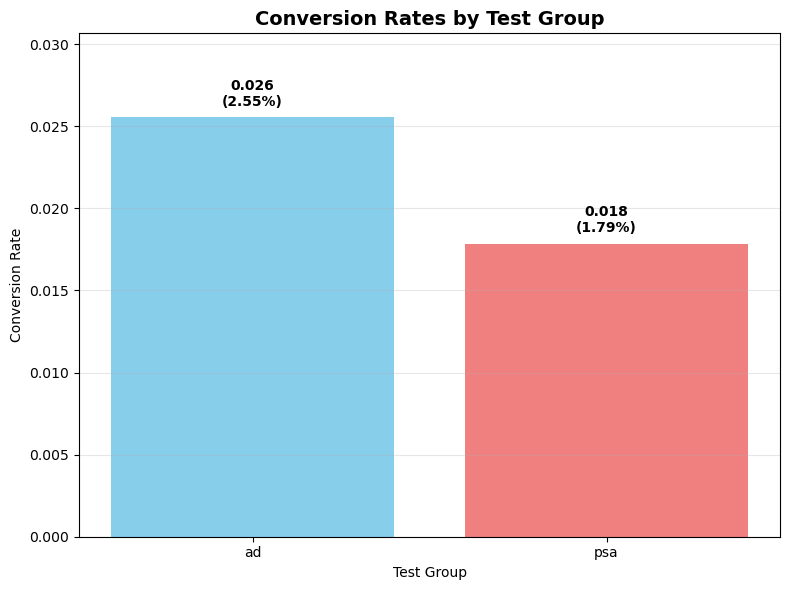

Chart shows the conversion rate difference between ad and psa groups


In [37]:
#Visualizing the results
import matplotlib.pyplot as plt

# Creating conversion rate visualization
conversion_rates = df.groupby('test group')['converted'].mean()
plt.figure(figsize=(8, 6))
bars = plt.bar(conversion_rates.index, conversion_rates.values, color=['skyblue', 'lightcoral'])
plt.title('Conversion Rates by Test Group', fontsize=14, fontweight='bold')
plt.ylabel('Conversion Rate')
plt.xlabel('Test Group')

# Adding percentage labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.0005,
             f'{height:.3f}\n({height*100:.2f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.ylim(0, max(conversion_rates.values) * 1.2)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Chart shows the conversion rate difference between ad and psa groups")

In [38]:
#Performing statistical significance tests
from scipy.stats import chi2_contingency
import pandas as pd

# Creating contingency table
contingency_table = pd.crosstab(df['test group'], df['converted'])
print("Contingency Table:")
print(contingency_table)
print()

# Performing chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Statistical Test Results:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")
print()

# Interpreting results
alpha = 0.05
if p_value < alpha:
    print(f" STATISTICALLY SIGNIFICANT (p < {alpha})")
    print("The difference in conversion rates is NOT due to random chance")
else:
    print(f" NOT STATISTICALLY SIGNIFICANT (p >= {alpha})")
    print("The difference might be due to random chance")

Contingency Table:
converted    False  True 
test group               
ad          550154  14423
psa          23104    420

Statistical Test Results:
Chi-square statistic: 54.0058
P-value: 0.000000
Degrees of freedom: 1

 STATISTICALLY SIGNIFICANT (p < 0.05)
The difference in conversion rates is NOT due to random chance


In [39]:
# Calculating key metrics
ad_conversion_rate = 0.025547
psa_conversion_rate = 0.017854
difference = ad_conversion_rate - psa_conversion_rate

# Calculating lift (improvement percentage)
lift = ((ad_conversion_rate - psa_conversion_rate) / psa_conversion_rate) * 100

# Calculating actual numbers
ad_group_size = 564577
ad_conversions = 14423
psa_group_size = 23524
psa_conversions = 420

print("=== A/B TEST RESULTS SUMMARY ===")
print(f"Ad group: {ad_conversions:,} conversions out of {ad_group_size:,} users ({ad_conversion_rate:.3f})")
print(f"PSA group: {psa_conversions:,} conversions out of {psa_group_size:,} users ({psa_conversion_rate:.3f})")
print()
print("=== BUSINESS IMPACT ===")
print(f"Absolute difference: {difference:.4f} ({difference*100:.2f} percentage points)")
print(f"Relative improvement (lift): {lift:.1f}%")
print()
print("=== STATISTICAL SIGNIFICANCE ===")
print(" Result is statistically significant (p < 0.001)")
print(" We can be confident the ads are causing higher conversions")
print()
print("=== RECOMMENDATION ===")
print("The advertising campaign is SUCCESSFUL and should be continued!")

=== A/B TEST RESULTS SUMMARY ===
Ad group: 14,423 conversions out of 564,577 users (0.026)
PSA group: 420 conversions out of 23,524 users (0.018)

=== BUSINESS IMPACT ===
Absolute difference: 0.0077 (0.77 percentage points)
Relative improvement (lift): 43.1%

=== STATISTICAL SIGNIFICANCE ===
 Result is statistically significant (p < 0.001)
 We can be confident the ads are causing higher conversions

=== RECOMMENDATION ===
The advertising campaign is SUCCESSFUL and should be continued!
